In [153]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [42]:
cat = cv2.imread('C:/Users/david/Downloads/CATS_DOGS/train/CAT/50.jpg')
cat = cv2.cvtColor(cat,cv2.COLOR_BGR2RGB)

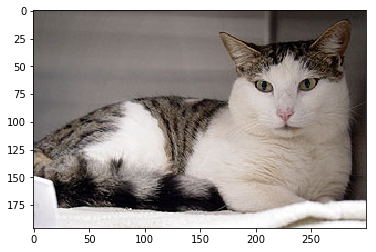

In [43]:
plt.imshow(cat)

In [46]:
cat.shape

(196, 300, 3)

In [50]:
dog = cv2.imread('C:/Users/david/Downloads/CATS_DOGS/train/DOG/55.jpg')
dog = cv2.cvtColor(dog,cv2.COLOR_BGR2RGB)

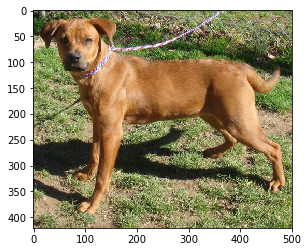

In [51]:
plt.imshow(dog)

In [52]:
dog.shape

(421, 500, 3)

In [53]:
from keras.preprocessing.image import ImageDataGenerator

In [89]:
image_gen = ImageDataGenerator(rotation_range=30,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               rescale=1/255,
                               shear_range=.1,
                               zoom_range=.2,
                               horizontal_flip=True,
                               fill_mode='nearest')
                               

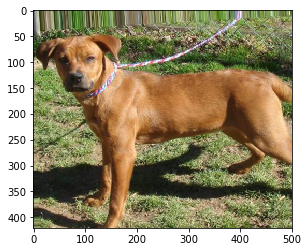

In [90]:
plt.imshow(image_gen.random_transform(dog))

In [96]:
image_gen.flow_from_directory('C:/Users/david/Downloads/CATS_DOGS/train',)

Found 18743 images belonging to 2 classes.


In [101]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,Flatten,Conv2D,MaxPooling2D

In [102]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(5,5),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,kernel_size=(5,5),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,kernel_size=(5,5),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [105]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 146, 146, 32)      2432      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 69, 69, 64)        51264     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 34, 34, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 64)        102464    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 14400)             0         
__________

In [112]:
train_image_gen = image_gen.flow_from_directory('C:/Users/david/Downloads/CATS_DOGS/train',
                                                target_size=(150,150),batch_size=32,
                                                class_mode='binary')

test_image_gen = image_gen.flow_from_directory('C:/Users/david/Downloads/CATS_DOGS/test',
                                                target_size=(150,150),batch_size=32,
                                                class_mode='binary')                        
                                                

Found 18743 images belonging to 2 classes.
Found 6251 images belonging to 2 classes.


In [113]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [117]:
model.fit_generator(train_image_gen,epochs=1,steps_per_epoch=10,
                    validation_data=test_image_gen,validation_steps=12)

In [118]:
from keras.models import load_model

In [119]:
new_model = load_model('cat_dog_100epochs.h5')

In [120]:
dog_file = 'C:/Users/david/Downloads/CATS_DOGS/test/DOG/9381.jpg'

In [121]:
from keras.preprocessing import image

In [157]:
dog_img = image.load_img(dog_file,target_size=(150,150))

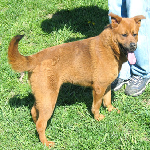

In [158]:
dog_img

In [159]:
dog_img = image.img_to_array(dog_img)

In [160]:
dog_img.shape

(150, 150, 3)

In [161]:
dog_img = np.expand_dims(dog_img, axis =0)

In [162]:
dog_img.shape

(1, 150, 150, 3)

In [164]:
new_model.predict_classes(dog_img)

array([[1]])